In [192]:
import pickle
with open('result/test_3_np.pkl', 'rb') as f:
    np_3l = pickle.load(f)

In [193]:
with open('result/test_3l_frac.pkl', 'rb') as f:
    frac_3l = pickle.load(f)

In [194]:
with open('result/true.pkl', 'rb') as f:
    true = pickle.load(f)

In [195]:
with open('result/max_3l.pkl', 'rb') as f:
    max_3l = pickle.load(f)

In [196]:
def get_index(l):
    test = []
    for i in l:
        i = list(i)
        test.append(i.index(max(i)))
    return test

In [197]:
np_3l = get_index(np_3l)
frac_3l = get_index(frac_3l)
true = get_index(true)
max_3l = get_index(max_3l)

In [198]:
import pandas as pd
import numpy as np
df_result = pd.DataFrame()
df_result['true'] = list(true)
df_result['frac_3l'] = list(frac_3l)
df_result['np_3l'] = list(np_3l)
df_result['max_3l'] = list(max_3l)

In [199]:
import pandas as pd
import numpy as np
df = pd.DataFrame()

In [200]:
df['true'] = true
df['frac_3l'] = list(np.array(true) == np.array(frac_3l))
df['np_3l'] = list(np.array(true) == np.array(np_3l))
df['max_3l'] = list(np.array(true) == np.array(max_3l))

In [201]:
print('ftraction pooling : ', np.mean(df['frac_3l']))
print('np polling: ', np.mean(df['np_3l']))
print('max polling: ', np.mean(df['max_3l']))

ftraction pooling :  0.7536
np polling:  0.6958
max polling:  0.7288


In [202]:
def get_frac_3l(p):
    if p['frac_3l'] == True and p['max_3l'] == False:
        return 'frac'
    elif p['max_3l'] == True and p['np_3l'] == False:
        return 'max'
    else:
        return 'same'

In [203]:
df['frac_over_np'] = df.apply(get_frac_3l, axis = 1)

In [204]:
sum(df['frac_over_np'] == 'frac')

1121

In [205]:
sum(df['frac_over_np'] == 'max')

1223

In [208]:
# max_over_no:
df_use = df_result.loc[list(df['frac_over_np'] == 'max')]

In [209]:
len(df_use)

1223

In [215]:
import seaborn as sns
m = confusion_matrix(df_use['max_3l'], df_use['np_3l'], labels=range(10))

Text(0.5,1,'Improvement_Max_Pooling_over_No_Pooling_3_layer')

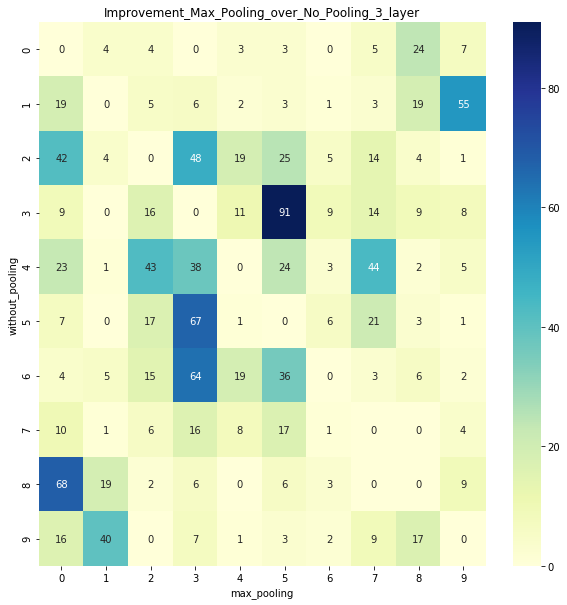

In [214]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(m,  annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('max_pooling')
plt.ylabel('without_pooling')
plt.title('Improvement_Max_Pooling_over_No_Pooling_3_layer')

In [216]:
# frac_over_max:
df_use = df_result.loc[list(df['frac_over_np'] == 'frac')]

In [219]:
import seaborn as sns
m = confusion_matrix(df_use['frac_3l'], df_use['max_3l'], labels=range(10))

Text(0.5,1,'Improvement_Fractional_Max_Pooling_over_Max_Pooling_3_layer')

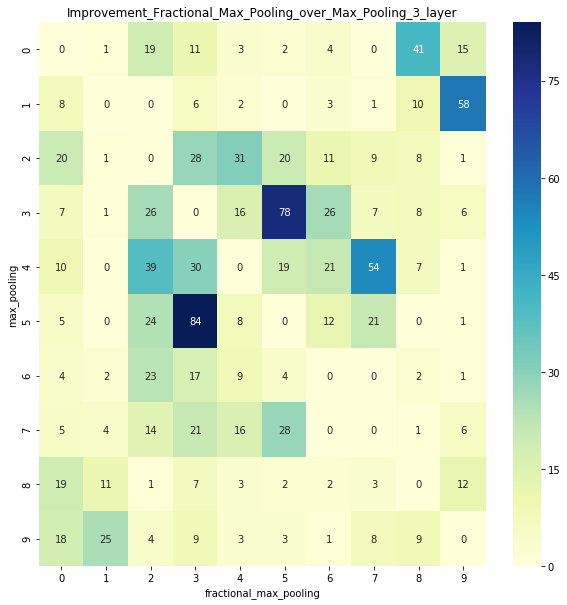

In [220]:

plt.figure(figsize=(10,10))
ax = sns.heatmap(m,  annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('fractional_max_pooling')
plt.ylabel('max_pooling')
plt.title('Improvement_Fractional_Max_Pooling_over_Max_Pooling_3_layer')

In [243]:
#different layers using frac:
with open('result/2l_frac.pkl', 'rb') as f:
    frac_2l = pickle.load(f)
with open('result/test_3l_frac.pkl', 'rb') as f:
    frac_3l = pickle.load(f)
with open('result/frac_4l.pkl', 'rb') as f:
    frac_4l = pickle.load(f) 

In [244]:
def get_index(l):
    test = []
    for i in l:
        i = list(i)
        test.append(i.index(max(i)))
    return test

In [245]:
frac_2l = get_index(frac_2l)
frac_3l = get_index(frac_3l)
frac_4l = get_index(frac_4l)

In [246]:
import pandas as pd
import numpy as np
df_result = pd.DataFrame()
df_result['true'] = list(true)
df_result['frac_2l'] = list(frac_2l)
df_result['frac_3l'] = list(frac_3l)
df_result['frac_4l'] = list(frac_4l)

In [247]:
import pandas as pd
import numpy as np
df = pd.DataFrame()

In [248]:
df['true'] = true
df['frac_2l'] = list(np.array(true) == np.array(frac_2l))
df['frac_3l'] = list(np.array(true) == np.array(frac_3l))
df['frac_4l'] = list(np.array(true) == np.array(frac_4l))

In [249]:
print('2l : ', np.mean(df['frac_2l']))
print('3l : ', np.mean(df['frac_3l']))
print('4l : ', np.mean(df['frac_4l']))

2l :  0.7178
3l :  0.7536
4l :  0.7758


In [250]:
def get_frac_3l(p):
    if p['frac_3l'] == False and p['frac_4l'] == True:
        return 'frac_4l'
    elif p['frac_3l'] == True and p['frac_2l'] == False:
        return 'frac_3l'
    else:
        return 'same'

In [251]:
df['frac_over_np'] = df.apply(get_frac_3l, axis = 1)

In [239]:
# 4l_over_3l:
df_use = df_result.loc[list(df['frac_over_np'] == 'frac_4l')]

In [240]:
len(df_use)

999

Text(0.5,1,'Improvement_4_layer_over_3_layer_Fractional_Max_Pooling')

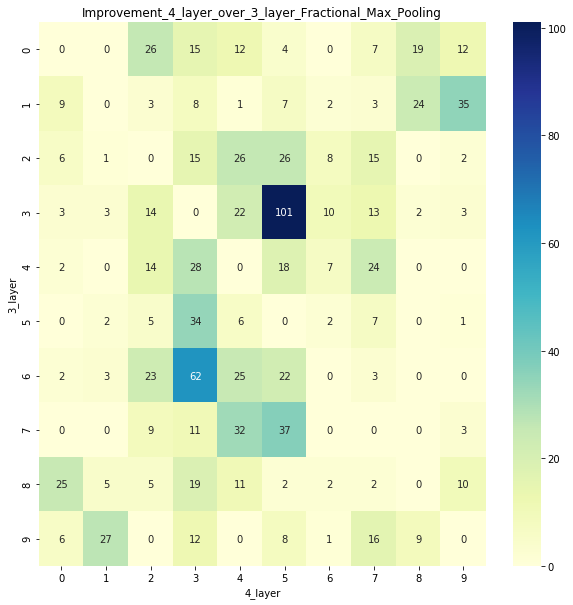

In [242]:
m = confusion_matrix(df_use['frac_4l'], df_use['frac_3l'], labels=range(10))
plt.figure(figsize=(10,10))
ax = sns.heatmap(m,  annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('4_layer')
plt.ylabel('3_layer')
plt.title('Improvement_4_layer_over_3_layer_Fractional_Max_Pooling')

In [252]:
# 3l_over_2l:
df_use = df_result.loc[list(df['frac_over_np'] == 'frac_3l')]

In [253]:
len(df_use)

1110

Text(0.5,1,'Improvement_3_layer_over_2_layer_Fractional_Max_Pooling')

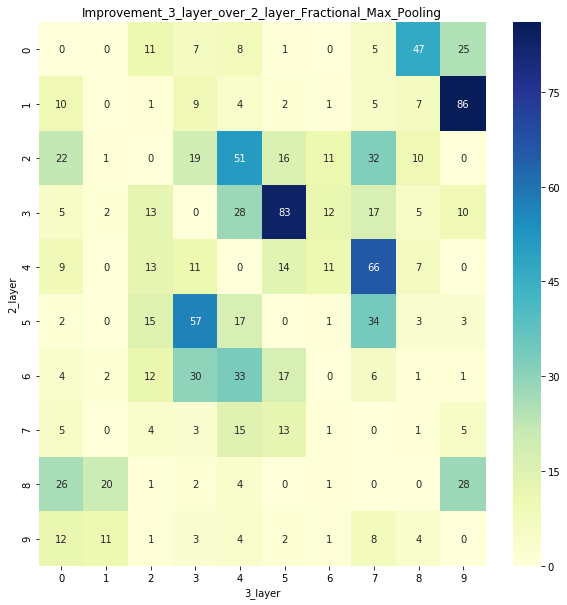

In [254]:
m = confusion_matrix(df_use['frac_3l'], df_use['frac_2l'], labels=range(10))
plt.figure(figsize=(10,10))
ax = sns.heatmap(m,  annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('3_layer')
plt.ylabel('2_layer')
plt.title('Improvement_3_layer_over_2_layer_Fractional_Max_Pooling')